In [49]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import earthpy.spatial as es
import earthpy.plot as ep


C:\Users\olive\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [59]:
# Get the current working directory
current_directory = os.getcwd()

# List the files and directories in the current directory
directory_contents = os.listdir(current_directory)

# Print the list
print("Files and directories in the current directory:")
for item in directory_contents:
    print(item)



import pandas as pd

# Read the Excel file into a DataFrame
data_ffr120 = pd.read_excel('DataFFR120.xlsx')

# Now you can use 'data_ffr120' as your DataFrame
# For example, you can print the first few rows:


# Create a new DataFrame 'df' using selected columns from 'data_ffr120'
df = pd.DataFrame(data_ffr120)  # Replace 'Column1', 'Column2', 'Column3' with actual column names

# Extract additional columns


# Print the new DataFrame
print("New DataFrame:")
print(df)


Files and directories in the current directory:
.ipynb_checkpoints
10_ACM_y60x10.kml
10_DEM_y50x10.tif
10_DEM_y50x10.zip
10_DEM_y60x10.tif
10_DEM_y60x10.zip
10_SRC_y60x10.kml
Bilder
cropped.tif
DataFFR120.xlsx
eula_F.pdf
output.tif
topographic.ipynb
topographic_kod-Copy1.ipynb
topographic_kod.ipynb
Untitled.ipynb
New DataFrame:
                                                 wkt_geom      id        left  \
0       Polygon ((515220.60800000000745058 6597330.138...       1  515220.608   
1       Polygon ((515220.60800000000745058 6597230.138...       2  515220.608   
2       Polygon ((515220.60800000000745058 6597130.138...       3  515220.608   
3       Polygon ((515220.60800000000745058 6597030.138...       4  515220.608   
4       Polygon ((515220.60800000000745058 6596930.138...       5  515220.608   
...                                                   ...     ...         ...   
708627  Polygon ((628320.60800000000745058 6535230.138...  708628  628320.608   
708628  Polygon ((6283

In [18]:
# Choose specific columns from 'data_ffr120'
selected_columns = ['left', 'top']  # Replace with the actual column names you want to select
coordinates_df = data_ffr120[selected_columns]

print(coordinates_df)

              left           top
0       515220.608  6.597330e+06
1       515220.608  6.597230e+06
2       515220.608  6.597130e+06
3       515220.608  6.597030e+06
4       515220.608  6.596930e+06
...            ...           ...
708627  628320.608  6.535230e+06
708628  628320.608  6.535130e+06
708629  628320.608  6.535030e+06
708630  628320.608  6.534930e+06
708631  628320.608  6.534830e+06

[708632 rows x 2 columns]


In [60]:

# Read the Excel file into a DataFrame
data_ffr120 = pd.read_excel('DataFFR120.xlsx')

# Choose specific columns from 'data_ffr120'
selected_columns = ['left', 'top']  # Replace with the actual column names you want to select
coordinates_df = data_ffr120[selected_columns]

# Create a grid by taking the Cartesian product of longitude and latitude values
longitude_values = coordinates_df['left'].unique()
latitude_values = coordinates_df['top'].unique()



#626x1132 MATRISSSSSSS

In [61]:
print(len(latitude_values))
print(len(longitude_values))


626
1132


# Define grid and read all different parameters into their own separate grids

In [93]:
volymmean = data_ffr120['Volymmean']
elevationmean = data_ffr120['elevationmean']

93.68735122680664


Grid DataFrame:
(626, 1132)


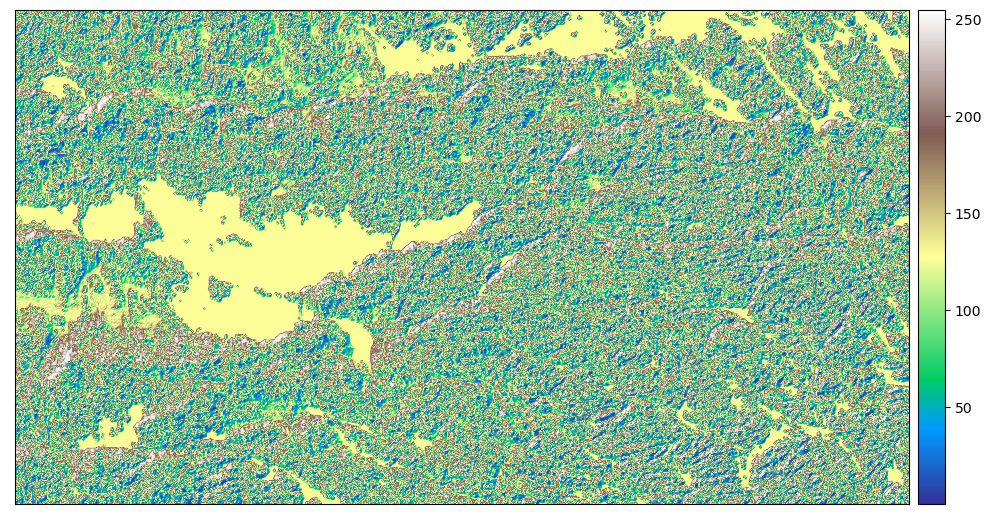

[[ 53.90634504  53.90634469  56.36943584 ...   1.32147853   1.71222496
    1.60387607]
 [ 59.92261505  59.92261505  53.86509256 ...   0.49507885   0.80958521
    1.21063378]
 [ 60.48137093  60.48137093  55.47262573 ...   0.           0.52570496
    0.80300751]
 ...
 [145.19785943 143.69283679 138.30862256 ...  48.15859795  41.21145248
   37.99677807]
 [141.41064453 138.77728103 135.71518393 ...  45.28882424  39.9912262
   40.72455485]
 [141.41064453 138.777281   135.71518394 ...  42.27403645  46.39559555
   51.74117661]]


In [118]:
grid = np.zeros((len(latitude_values), len(longitude_values)))
# Print the resulting grid DataFrame
print("Grid DataFrame:")
print(grid.shape)
Volymmean_grid = np.copy(grid)
Elevationmean_grid = np.copy(grid)
count=0
for j in range(grid.shape[1]):
    for i in range(grid.shape[0]):            
            Volymmean_grid[i,j] = volymmean[count]
            Elevationmean_grid[i,j] = elevationmean[count]
           
            count+=1
import earthpy.spatial as es
import earthpy.plot as ep

hillshade = es.hillshade(Elevationmean_grid, azimuth=315, altitude=0)

ep.plot_bands(hillshade, cmap='terrain')
plt.show()


# Initialize all parameters and grids to prepare for simulation

In [179]:

# Constants and parameters
grid_size = (grid.shape)
nTimeSteps = 500
windDirection = 90 * np.pi / 180
dt = 0.5
windSpeed = 20
fireSpeed = 1
Ks = 0.5
slope = 0 * np.pi / 180
slopeDirection = 0
cmap = mcolors.ListedColormap(['blue', 'green', 'orange', 'black']) #0 , #1, #2, # 3


# Define vegetation types with associated properties
vegetation_types = {
    0: {'fuel_consumption_rate': 0, 'moisture': 0},
    2: {'fuel_consumption_rate': 0.2, 'moisture': 0.3, 'b1': 0.1, 'b2': 0.5},
    1: {'fuel_consumption_rate': 0.5, 'moisture': 0.2, 'b1': 0.2, 'b2': 0.6},
}

class_codes = [1, 2, 3] #{'trees': 1, 'grass': 2, 'water': 3}



class_grid = np.full(grid_size, class_codes[0], dtype='object') #Only trees

# Create an elevation grid with a river
elevation_grid = Elevationmean_grid
hillshade = es.hillshade(elevation_grid, azimuth=315, altitude=0) #Used for plotting
#elevation_grid = np.zeros((grid_size))

for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            vegetation_cell = class_grid[i,j]
            if vegetation_cell in vegetation_types:
                grid[i,j] = 1
            

                
# Set the ignition point at the center of the grid
ignition_point = (grid_size[0] // 2, grid_size[1] // 2)
grid[ignition_point] = 2  # 2 represents a burning cell



# Main simulation code with plotting

In [180]:
# Main loop
# Calculate wind vector components
u = windSpeed * np.cos(windDirection+np.pi)
v = windSpeed * np.sin(windDirection+np.pi)
x_coords, y_coords = np.meshgrid(np.arange(grid_size[0]), np.arange(grid_size[1]))


for step in tqdm(range(1, nTimeSteps + 1), desc="Simulation Progress"):
    # Create arrays to store the updated grid
    new_grid = grid.copy()
    if step>20:
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                cell = grid[i, j]
                vegetation_cell = class_grid[i,j]
                v_type = vegetation_types[vegetation_cell]
                if vegetation_cell in vegetation_types:  # If the cell has vegetation

                    if cell == 2:  # If the cell is on fire
                        # Calculate the probability of fire extinction
                        pE = v_type['fuel_consumption_rate'] * (
                            1 / (np.exp(-v_type['b1'] *v_type['moisture']) * v_type['b2'] ** 2)
                        )
                        pE=0.01
                        if np.random.random() < pE:
                                new_grid[i, j] = 3  # 3 represents a cell that was previously on fire and cannot catch fire again

            

    # Update the grid for fire spread
  
    for i in tqdm(range(grid.shape[0]), desc="Simulation Progress"):
        for j in range(grid.shape[1]):
           
            a_choices = [1, 2, 3, 4]
            a_weights = [0.8, 0.15, 0.04, 0.01]
            a = np.random.choice(a_choices, p=a_weights)

            distances = np.linalg.norm(np.dstack((x_coords - i, y_coords - j)), axis=2)
            neighbors = np.where(distances<=a)
            paired_arrays = list(zip(neighbors[0],neighbors[1]))
            for neighbor in paired_arrays:
                # Check if the neighbor is within the bounds of the grid
                if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                    if grid[neighbor] == 1:
                        # Spread the fire to the neighbor based on the same logic as before
                        elev_diff = elevation_grid[i, j] - elevation_grid[neighbor[0], neighbor[1]]

                        if -5 <= elev_diff <= 5:  # You can adjust this threshold as needed
                            nu = np.arctan2(i - neighbor[0], j - neighbor[1]) - slopeDirection
                            if nu < 0:
                                nu += 2 * np.pi

                            if (0 < nu < np.pi / 2) or (3 * np.pi / 2 < nu < 2 * np.pi):
                                fireSpread = fireSpeed * Ks * np.exp(
                                    3.533 * (np.tan(slope) * np.cos(nu)) ** 1.2 * np.cos(nu)
                                ) * np.exp(0.1783 * windSpeed * np.cos(nu - windDirection))
                            else:
                                fireSpread = fireSpeed * Ks * np.exp(
                                    3.533 * (np.tan(slope) * np.cos(nu)) ** 1.2 * np.cos(nu)
                                ) * np.exp(0.1783 * windSpeed * np.cos(nu - windDirection))

                            # Ignite the neighbor based on a random probability
                            if np.random.random() < fireSpread * dt:
                                new_grid[neighbor] = 2  # 2 represents a burning cell



    # Update the grid for the next time step
    grid = new_grid
    
    if np.mod(step,1) == 0:
           # Clear the output and plot the updated state of the grid
        clear_output(wait=True)
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        norm = Normalize(vmin=0, vmax=3)
        # Plot the first subplot
        norm = Normalize(vmin=0, vmax=3)
        axes[0].imshow(grid, cmap=cmap, norm=norm)
        axes[0].set_title(f'Time Step {step}/{nTimeSteps}, Trees on fire: {np.count_nonzero(grid == 2)}')
        middle_x, middle_y = grid_size[1] // 2, grid_size[0] // 2
        axes[0].arrow(middle_x, middle_y, u, v, color='blue', width=1, head_width=11, head_length=3)
        
        
        # Plot the second subplot (you can customize this as needed)
        norm = Normalize(vmin=0, vmax=100)
        axes[1].imshow(elevation_grid, norm=norm)  # Replace another_grid with the grid you want to display
        axes[1].set_title(f'Elevation Grid')
        plt.show()

Simulation Progress:   0%|                                                                     | 0/500 [06:59<?, ?it/s]


KeyboardInterrupt: 

In [182]:
# Main loop
u = windSpeed * np.cos(windDirection + np.pi)
v = windSpeed * np.sin(windDirection + np.pi)
x_coords, y_coords = np.meshgrid(np.arange(grid_size[0]), np.arange(grid_size[1]))

# Precompute trigonometric functions
cos_wind_direction = np.cos(windDirection)
sin_wind_direction = np.sin(windDirection)
tan_slope = np.tan(slope)

# Precompute exponential term for fire spread
exp_term = np.exp(3.533 * (tan_slope * np.cos(0)) ** 1.2 * np.cos(0))

# Vectorized indices for grid
grid_indices = np.indices(grid.shape)

for step in tqdm(range(1, nTimeSteps + 1), desc="Simulation Progress"):
    new_grid = grid.copy()

    
    # Update the grid for fire spread
    a_choices = [1, 2, 3, 4]
    a_weights = [0.8, 0.15, 0.04, 0.01]
    a = np.random.choice(a_choices, p=a_weights, size=grid.shape)

    distances = np.linalg.norm(np.dstack((x_coords - np.arange(grid_size[0])[:, np.newaxis], y_coords - np.arange(grid_size[1]))), axis=2)
    neighbors = np.where(distances <= a)
    for i, j in zip(*neighbors):
        valid_neighbors = (0 <= i < grid.shape[0]) & (0 <= j < grid.shape[1]) & (grid[i, j] == 1)
        i, j = i[valid_neighbors], j[valid_neighbors]
        
        elev_diff = elevation_grid - elevation_grid[i, j][:, np.newaxis]
        valid_elev_diff = (-5 <= elev_diff) & (elev_diff <= 5)
        
        nu = np.arctan2(i - j[:, np.newaxis], j - i[:, np.newaxis]) - slopeDirection
        nu[nu < 0] += 2 * np.pi

        valid_nu = ((0 < nu) & (nu < np.pi / 2)) | ((3 * np.pi / 2 < nu) & (nu < 2 * np.pi))
        valid_nu = np.tile(valid_nu, (grid.shape[0], 1))

        fireSpread = fireSpeed * Ks * np.exp(
            3.533 * (tan_slope * cos_slope[nu]) ** 1.2 * cos_slope[nu]
        ) * np.exp(0.1783 * windSpeed * cos_slope[nu - windDirection])

        ignite_probabilities = np.random.random(grid.shape) < fireSpread * dt
        new_grid[ignite_probabilities & valid_elev_diff & valid_nu] = 2

    grid = new_grid

    if np.mod(step, 1) == 0:
        # Consolidated plotting
        clear_output(wait=True)
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        norm = Normalize(vmin=0, vmax=3)

        # Plot the first subplot
        axes[0].imshow(grid, cmap=cmap, norm=norm)
        axes[0].set_title(f'Time Step {step}/{nTimeSteps}, Trees on fire: {np.count_nonzero(grid == 2)}')
        middle_x, middle_y = grid_size[1] // 2, grid_size[0] // 2
        axes[0].arrow(middle_x, middle_y, u, v, color='blue', width=1, head_width=11, head_length=3)

        # Plot the second subplot (you can customize this as needed)
        norm = Normalize(vmin=0, vmax=100)
        axes[1].imshow(elevation_grid, norm=norm)
        axes[1].set_title(f'Elevation Grid')
        plt.show()


Simulation Progress:   0%|                                                                     | 0/500 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (1132,626) (626,1) 

# Additional Plotting